In [7]:
# 1. 데이터 로드 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 날짜 형식 변환
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# 연도 및 월 추출
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month

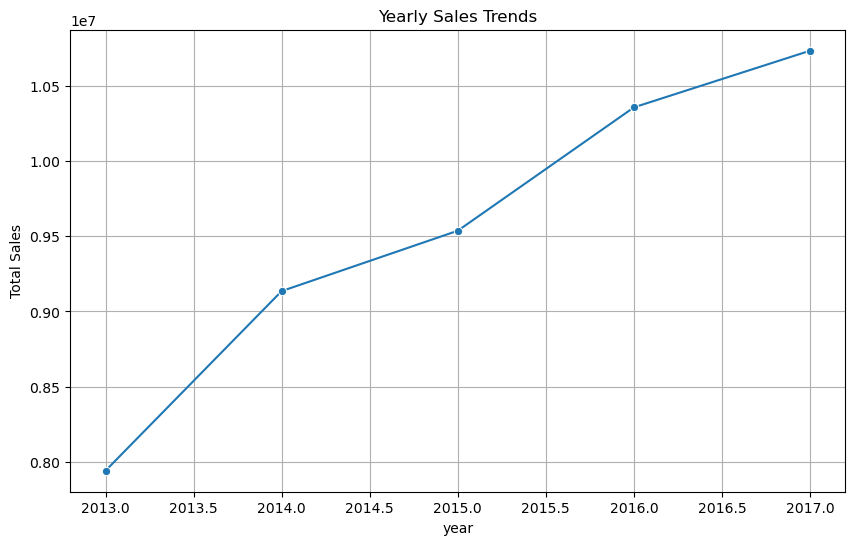

In [13]:
# 2. 연도별 판매령 추세

# 연도별 판매량 합계
yearly_sales = train_df.groupby('year')['sales'].sum().reset_index()

# 연도별 판매량 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_sales,x='year',y='sales', marker='o')
plt.title('Yearly Sales Trends')
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\ranes\AppData\Local\Temp\ipykernel_22496\1660497620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='sales', palette='viridis')


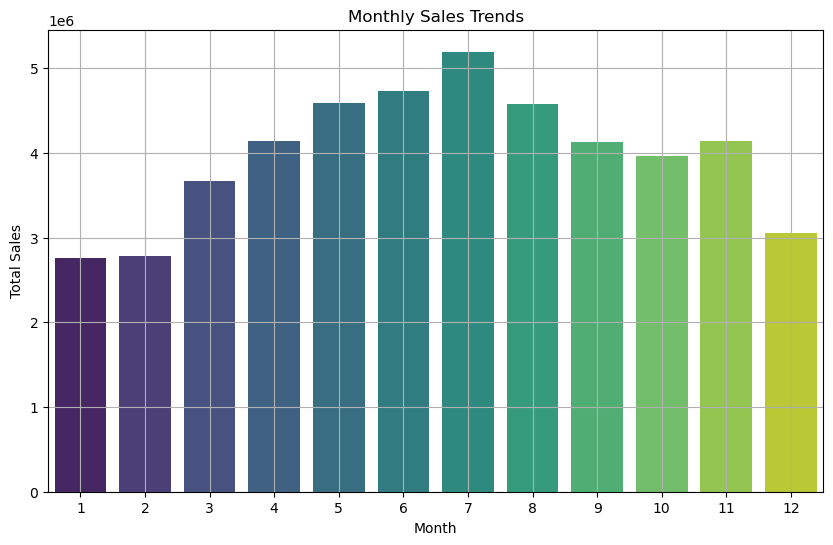

In [17]:
# 3. 월별 판매량 추세
# 월별 판매량 합계
monthly_sales = train_df.groupby('month')['sales'].sum().reset_index()

# 월별 판매량 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='sales', palette='viridis')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\ranes\AppData\Local\Temp\ipykernel_22496\3226798241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales,x='store',y='sales',palette='coolwarm')


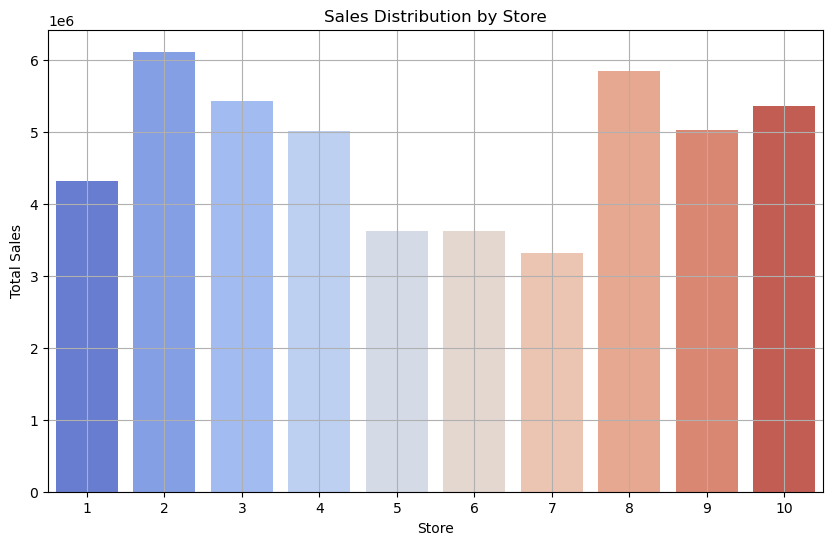

In [23]:
# 4. 상점별 판먀량 분포
# 상점별 판매량 분포
store_sales = train_df.groupby('store')['sales'].sum().reset_index()
# 상점별 판매량 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=store_sales,x='store',y='sales',palette='coolwarm')
plt.title('Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\ranes\AppData\Local\Temp\ipykernel_22496\3376345972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_sales, x='item',y='sales',palette='magma')


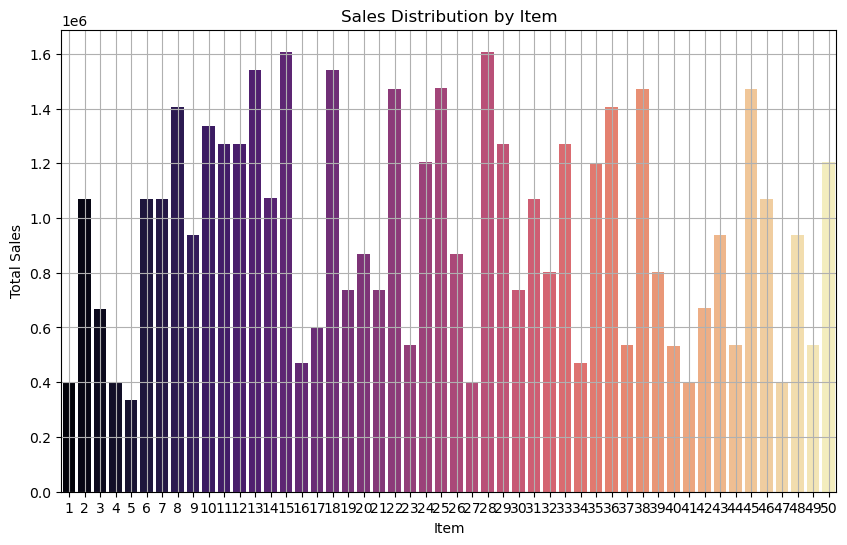

In [27]:
# 5. 아이템별 판매량 분포
# 아템별 판매량 합계
item_sales = train_df.groupby('item')['sales'].sum().reset_index()

# 아이템별 판매량 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=item_sales, x='item',y='sales',palette='magma')
plt.title('Sales Distribution by Item')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

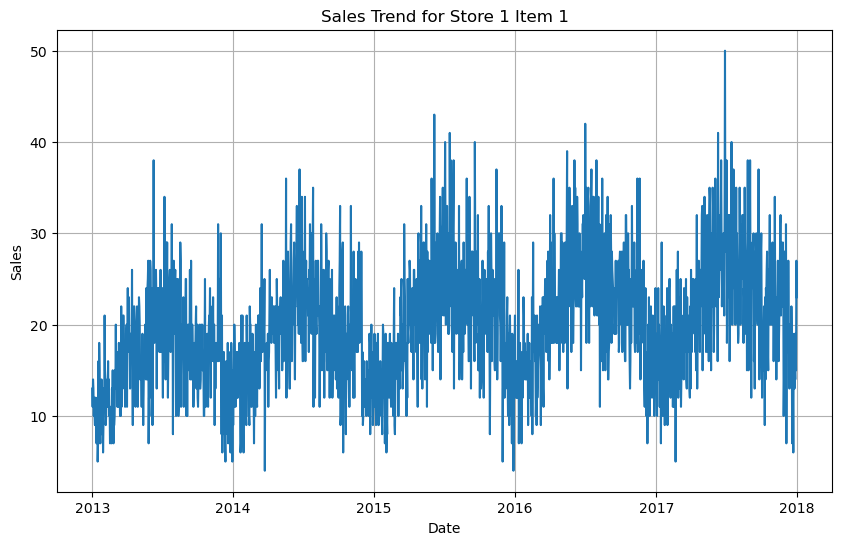

In [29]:
# 6. 특정 상점 및 아이템의 시간에 따른 판매량 추세
# 특정 상점과 아티템 선택(예_상점1, 아이템 1)
store_id = 1
item_id = 1

store_item_sales = train_df[(train_df['store'] == store_id) & (train_df['item'] == item_id)]
store_item_sales = store_item_sales.groupby('date')['sales'].sum().reset_index()

# 시간에 따른 판매량 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=store_item_sales, x='date', y='sales')
plt.title(f'Sales Trend for Store {store_id} Item {item_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

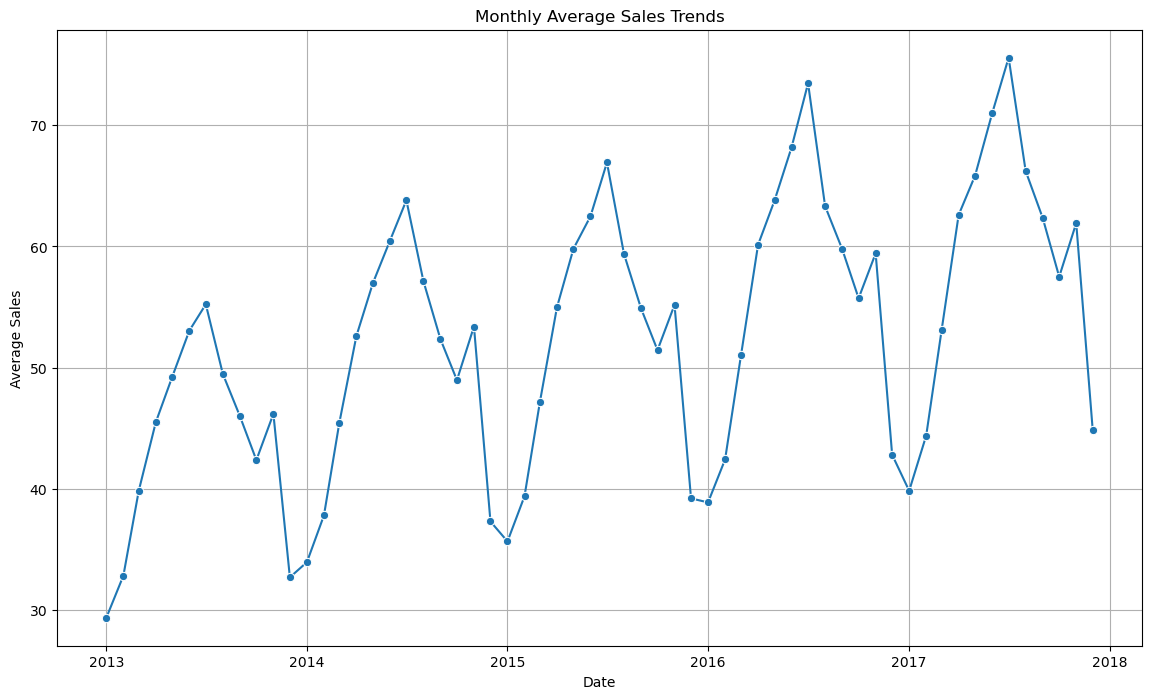

In [33]:
# 7. 모든 상점과 아이템의 월별 평균 판매량
# 월별 판매량 평균
monthly_avg_sales = train_df.groupby(['year', 'month'])['sales'].mean().reset_index()

# 'year'와 'month' 컬럼을 int형으로 변환하여 날짜 생성
monthly_avg_sales['date'] = monthly_avg_sales.apply(lambda row: dt.datetime(int(row['year']), int(row['month']), 1), axis=1)

# 월별 평균 판매량 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_avg_sales, x='date', y='sales', marker='o')
plt.title('Monthly Average Sales Trends')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()